# **Assignment 3: Bank Marketing Data Set**

```
Nama : Diva Nabila 
Kode : PYTN-KS20-019
```

# **Project Review**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The smallest datasets are provided to test more computationally demanding machine learning algorithms. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variabel y)

# **Import Pustaka**

In [13]:
import numpy as np
import pandas as pd 
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from dython.nominal import identify_numeric_columns, identify_nominal_columns
from dython.nominal import associations 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from joblib import dump

# **Data Loading**

Read the dataset

In [7]:
df = pd.read_csv("D:/bank-additional/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# **Data Cleaning**

In [8]:
# Check missing values 
df.isnull().mean()

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [11]:
# Mengidentifikasi kolom yang termasuk data kategorik dan numerik
categorical,numeric = identify_nominal_columns(df),identify_numeric_columns(df)
for i,j in zip(["Categorical Columns","Numerical Columns"],[categorical,numeric]):
    print(f"{i}\t:{j}")

Categorical Columns	:['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numerical Columns	:['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


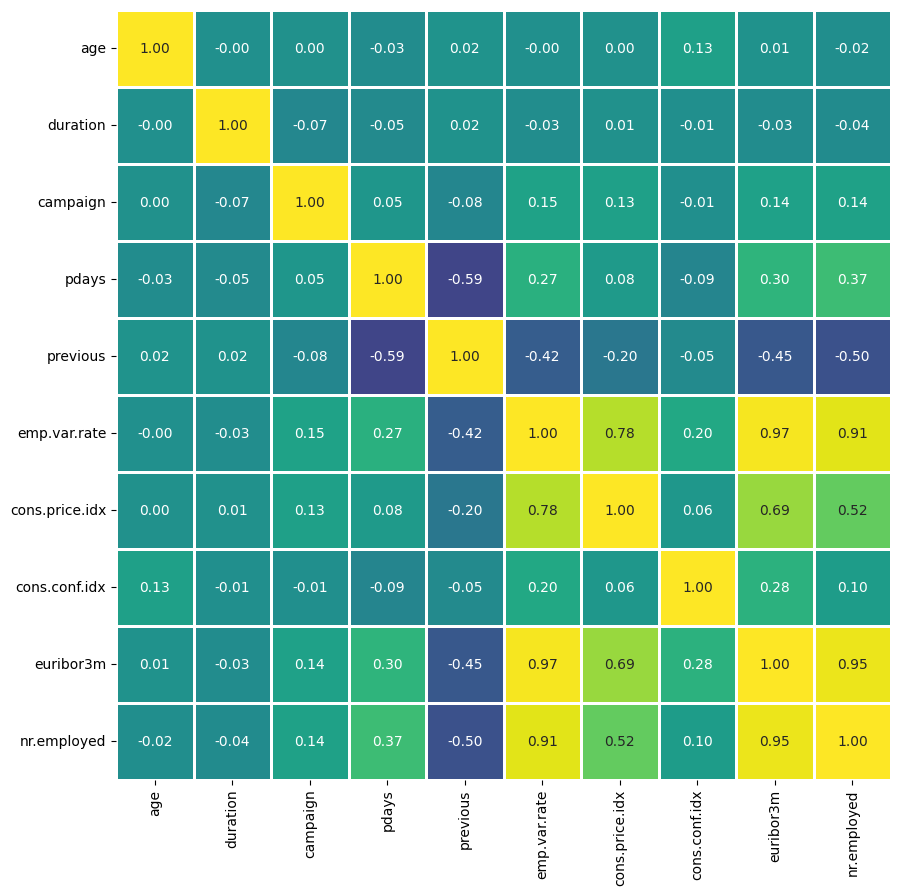

In [14]:
# Mencari korelasi keduanya
correlation = associations(df,plot = False)
# Mencari korelasi keduanya
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric].corr(),annot=True,cmap="viridis",fmt=".2f",linewidths=2,cbar=False,vmin=-1,vmax=1);

In [15]:
#buat fungsi untuk memilih kolom yang memiliki korelasi tinggi
def high_corr(df,threshold=0.7):
    corr = df.corr()
    high_corr = np.where(corr>threshold)
    high_corr = [(corr.index[x],corr.columns[y]) for x,y in zip(*high_corr) if x!=y and x<y]
    return high_corr

corr_columns = high_corr(df[numeric])

# Menghapus kolom yang memiliki korelasi tinggi
df.drop(columns=[x[1] for x in corr_columns],inplace=True)

# **Data Preprocessing**

In [16]:
# Membagi data training dan data testing

X = df.drop(columns=["y"])
y = df["y"]
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=8)

print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

Training dataset	: 28831
Testing dataset		: 12357


In [17]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx
9556,42,services,married,high.school,no,no,yes,telephone,jun,mon,230,3,999,0,nonexistent,1.4,-41.8
25455,30,entrepreneur,married,high.school,no,no,no,cellular,nov,wed,706,1,999,1,failure,-0.1,-42.0
1477,44,technician,divorced,unknown,no,no,yes,telephone,may,thu,233,2,999,0,nonexistent,1.1,-36.4
720,42,admin.,married,university.degree,no,yes,no,telephone,may,tue,254,2,999,0,nonexistent,1.1,-36.4
5620,50,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,mon,133,1,999,0,nonexistent,1.1,-36.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3801,40,blue-collar,married,basic.6y,no,yes,no,telephone,may,fri,130,3,999,0,nonexistent,1.1,-36.4
19686,56,technician,married,professional.course,no,yes,no,cellular,aug,thu,124,3,999,0,nonexistent,1.4,-36.1
19932,30,admin.,single,university.degree,no,no,no,cellular,aug,fri,459,1,999,0,nonexistent,1.4,-36.1
29673,52,services,married,basic.6y,no,no,no,cellular,apr,mon,157,1,999,1,failure,-1.8,-47.1


In [18]:
scaler = StandardScaler()
te = TargetEncoder(random_state=8)

num_cols = X_train.select_dtypes(include="number").columns.tolist()
cat_cols = X_train.select_dtypes(include="object").columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', scaler)])

categorical_transformer = Pipeline(steps=[
    ('onehot', te)])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)]).set_output(transform='pandas')

preprocessor.fit_transform(X_train,y_train)

,num__age,num__duration,num__campaign,num__pdays,num__previous,num__emp.var.rate,num__cons.conf.idx,cat__job,cat__marital,cat__education,cat__default,cat__housing,cat__loan,cat__contact,cat__month,cat__day_of_week,cat__poutcome
9556,0.187739,-0.110058,0.157530,0.197653,-0.349035,0.838433,-0.278361,0.081978,0.101738,0.113857,0.128339,0.110853,0.107605,0.053080,0.108265,0.101906,0.087928
25455,-0.962801,1.724121,-0.572419,0.197653,1.646016,-0.117139,-0.321692,0.083663,0.100619,0.111403,0.129191,0.110759,0.114116,0.148094,0.104134,0.117314,0.143514
1477,0.379496,-0.098499,-0.207444,0.197653,-0.349035,0.647319,0.891591,0.105502,0.104388,0.147579,0.128339,0.110853,0.107605,0.053080,0.063966,0.121441,0.087928
720,0.187739,-0.017579,-0.207444,0.197653,-0.349035,0.647319,0.891591,0.125552,0.101696,0.135092,0.128438,0.115086,0.114658,0.053673,0.065709,0.115983,0.088217
5620,0.954766,-0.483830,-0.572419,0.197653,-0.349035,0.647319,0.891591,0.069024,0.101514,0.096516,0.052209,0.114613,0.113188,0.054064,0.062985,0.099456,0.087004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3801,-0.004017,-0.495390,0.157530,0.197653,-0.349035,0.647319,0.891591,0.068991,0.101738,0.077659,0.128339,0.114283,0.113646,0.053080,0.063966,0.104448,0.087928
19686,1.530036,-0.518510,0.157530,0.197653,-0.349035,0.838433,0.956589,0.107322,0.101696,0.111831,0.128438,0.115086,0.114658,0.146562,0.102752,0.123376,0.088217
19932,-0.962801,0.772352,-0.572419,0.197653,-0.349035,0.838433,0.956589,0.128406,0.141229,0.134384,0.129191,0.110759,0.114116,0.148094,0.107775,0.103347,0.088532
29673,1.146523,-0.391351,-0.572419,0.197653,1.646016,-1.200122,-1.426647,0.079478,0.100619,0.082602,0.129191,0.110759,0.114116,0.148094,0.214169,0.101497,0.143514


Pemrosesan dataset menggunakan standard scaler dan one hot encoder
- standard scaler betujuan agar skala data numerik memiliki rentang 0-1 
- one hot encoder untuk mengubah data kategorikal menjadi numerik.

# **Logistic regression**

In [19]:
# Membuat model
model_logit = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight="balanced",random_state=8,max_iter=1000))])

model_logit.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   TargetEncoder(random_state=8))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=8))])

In [20]:
# Membuat prediksi dengan data testing
logistic_pred = model_logit.predict(X_test)

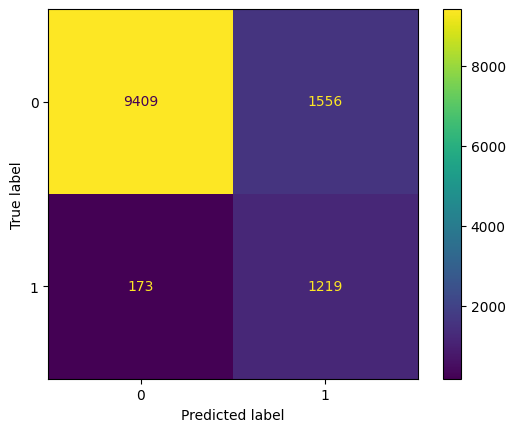

F1 Score:58.50731941444685%


In [21]:
# Mengevaluasi model Logistic Regression pada dataset
#import f1 score
from sklearn.metrics import f1_score
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,logistic_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"F1 Score:{f1_score(y_test,logistic_pred)*100}%")

In [22]:
# Fitting untuk keseluruhan data
final_log_model = model_logit.fit(X,y)
final_log_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   TargetEncoder(random_state=8))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=8))])

In [23]:
# Nilai intercept pada masing-masing atribut
pd.DataFrame(
    data=[final_log_model.steps[1][1].intercept_[0]] + list(final_log_model.steps[1][1].coef_[0]),
    columns=["Unstandardized Coefficients"],
    index=["Constant"] + list(num_cols + cat_cols)
)

,Unstandardized Coefficients
Constant,-4.094550
age,0.030757
duration,1.752481
campaign,-0.084911
pdays,-0.422486
previous,-0.076693
emp.var.rate,-1.019788
cons.conf.idx,0.116839
job,3.890863
marital,2.078267


In [24]:
# Model akhir
x=sp.Symbol("(x)")
beta=[]
for _ in list(num_cols + cat_cols):
    beta.append(sp.Symbol(f"({_})"))

total=np.round(final_log_model.steps[1][1].intercept_[0],3)
for _ in range(len(X.columns)):
    total = total + (beta[_]*np.round(final_log_model.steps[1][1].coef_[0,_],3))

sp.Eq(sp.log((sp.pi*x)/(1-(sp.pi*x))),total)

Eq(log(pi*(x)/(-pi*(x) + 1)), 0.031*(age) - 0.085*(campaign) + 0.117*(cons.conf.idx) + 2.715*(contact) + 0.496*(day_of_week) + 4.914*(default) + 1.752*(duration) + 5.144*(education) - 1.02*(emp.var.rate) + 0.198*(housing) + 3.891*(job) + 0.085*(loan) + 2.078*(marital) + 4.497*(month) - 0.422*(pdays) - 0.065*(poutcome) - 0.077*(previous) - 4.095)

# **K-Nearest Neighbors**

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Thinkpad Yoga\.conda\envs\hac

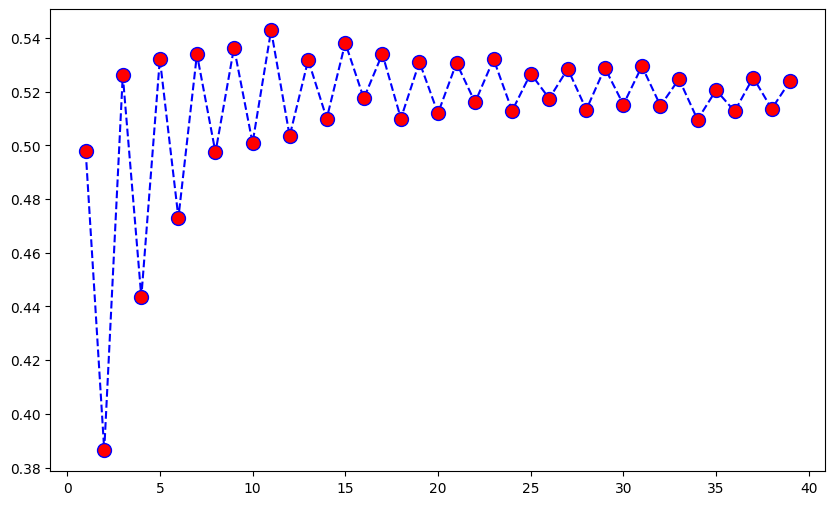

In [25]:
# Mencari nilai K yang optimal dengan melihat rating errornya

f1_score_knn = []
for i in range(1,40):
    model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=i))])
    model_knn.fit(X_train,y_train)
    pred_i = model_knn.predict(X_test)
    f1_score_knn.append(f1_score(y_test,pred_i))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),f1_score_knn,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [26]:
# Membuat dan melatih model
k = f1_score_knn.index(max(f1_score_knn))+1
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=k))])
knn_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   TargetEncoder(random_state=8))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=11))])

Setelah membuat dan melatih model, kita lakukan prediksi terhadap model KNN dengan data testing

In [27]:
# Membuat prediksi dengan data testing
knn_pred = knn_model.predict(X_test)

Setelah melakukan prediksi degan model knn, selanjutnya kita evaluasi modelnya

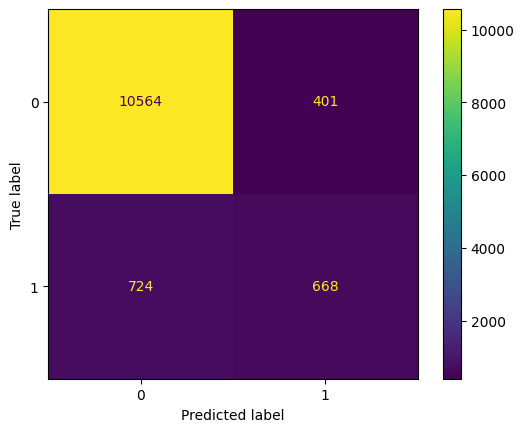

In [28]:
# Mengevaluasi model
ConfusionMatrixDisplay.from_predictions(y_test,knn_pred,ax=plt.gca())
plt.grid(False)
plt.show()

In [29]:
# Lihat akurasi skornya
print(f"F1 Score: {f1_score(y_test,knn_pred)*100}%")

F1 Score: 54.286875253961796%


Skor f1 prediksi dataset menggunakan model KNeighbors sebesar 54.286%

In [30]:
# Membuat model dengan seluruh dataset
knn_model.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   TargetEncoder(random_state=8))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=11))])

# **SVM**

In [31]:
# Membuat model SVM
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=8,class_weight="balanced"))])
svm_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   TargetEncoder(random_state=8))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', SVC(class_weight='balanced', random_state=8))])

Setelah membuat dan melatih model, kita lakukan prediksi pada model tersebut menggunakan data testing

In [32]:
# Membuat prediksi model svm dengan data testing
svm_pred = svm_model.predict(X_test)

Setelah melakukan prediksi dengan model svm, kemudian kita evaluasi modelnya

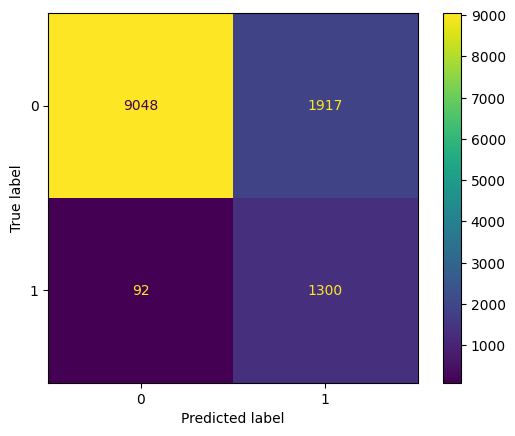

f1 Score: 56.41136906053374%


In [33]:
# Evaluasi model dan akurasi skornya
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,svm_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"f1 Score: {f1_score(y_test,svm_pred)*100}%")

Skor f1 yang didapat model SVM untuk dapat memprediksi dataset ini adalah sebesar 56.411%

In [34]:
# Membuat dan melatih model dengan seluruh data
final_svm_model = svm_model.fit(X,y)
final_svm_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   TargetEncoder(random_state=8))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', SVC(class_weight='balanced', random_state=8))])

# **Decision Tree**

In [35]:
# Membuat dan melatih model
dec_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=8,max_depth=5,class_weight='balanced'))])
dec_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   TargetEncoder(random_state=8))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        random_state=8))])

Setelah membuat dan melatih model, langkah selanjutnya adalah memprediksikan model dengan data testing

In [36]:
# Membuat prediksi dengan data testing
dec_pred = dec_model.predict(X_test)

Setelah melakukan prediksi pada model, kemudian kita coba lakukan evaluasi

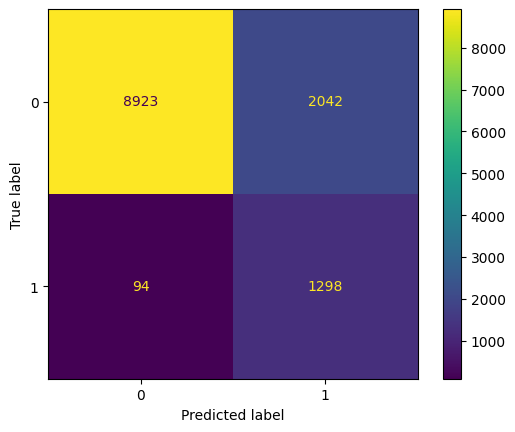

f1 Score: 54.860524091293314%


In [37]:
# Evaluasi model dan lihat skor akurasinya
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,dec_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"f1 Score: {f1_score(y_test,dec_pred)*100}%")

Skor akurasi yang didapat model Decision Tree untuk dapat memprediksi dataset sebesar 90.806%

In [38]:
# Membuat model dan melatih model dengan keseluruhan data
final_dec_model = dec_model.fit(X,y)
final_dec_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   TargetEncoder(random_state=8))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        random_state=8))])

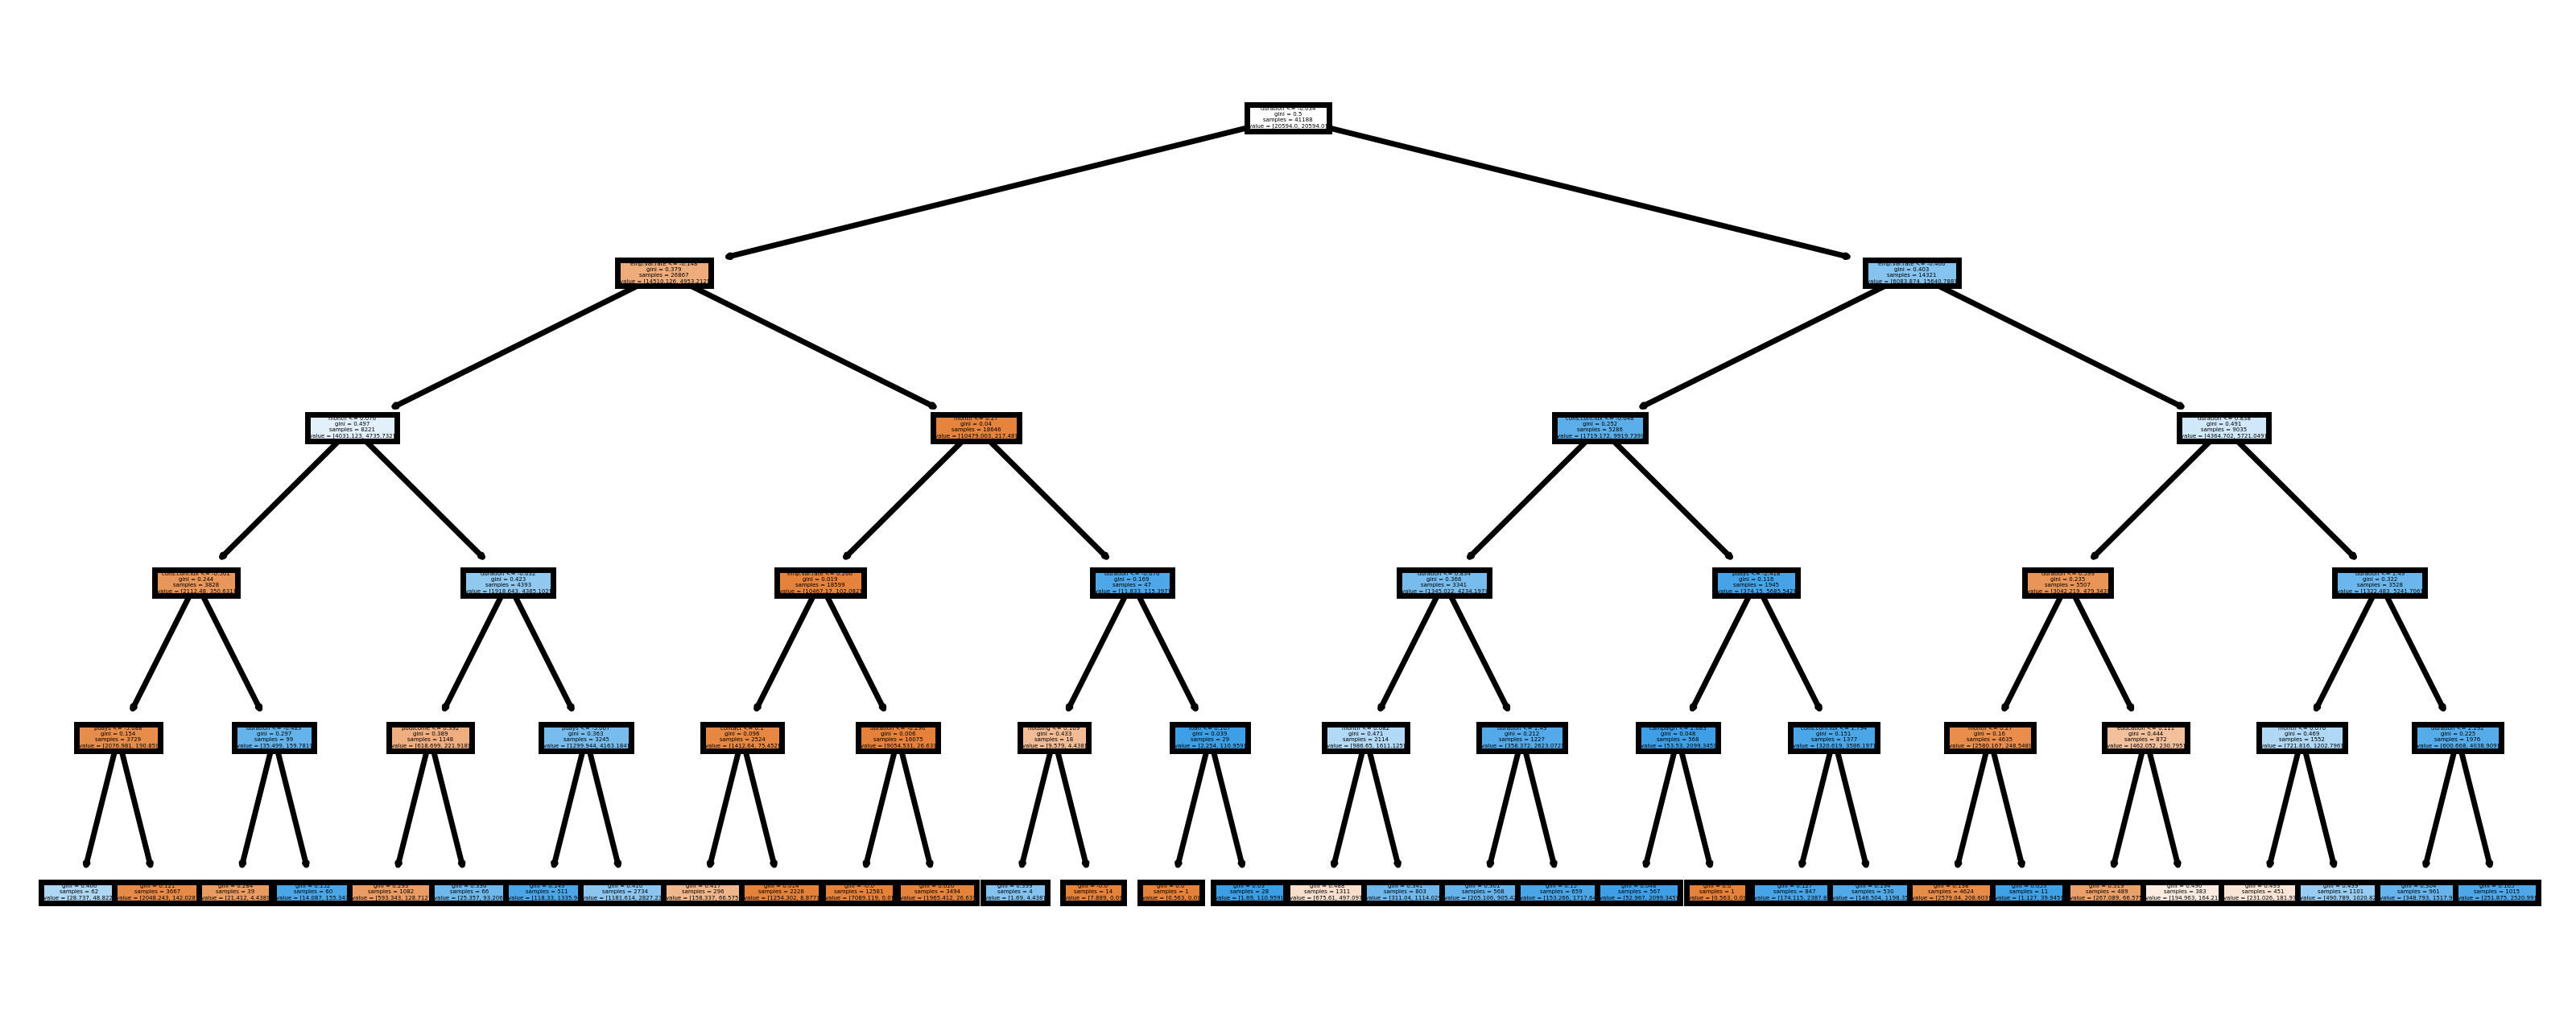

In [39]:
# Memvisualisasikan hasil dt
plt.figure(figsize=(8,3),dpi=500)
plot_tree(final_dec_model.steps[1][1],filled=True,feature_names=list(num_cols + cat_cols))
plt.show()

# **Random Forest**

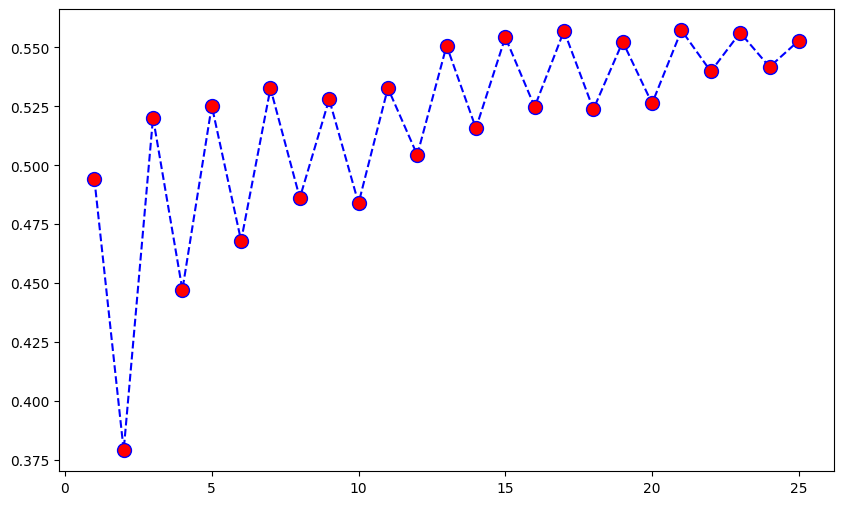

In [40]:
# Menghitung dan memvisualisasikan error rates for each number of trees
f1_score_rf = []

for i in range(1,26):
    model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=8,n_estimators=i,class_weight="balanced"))])
    model_rf.fit(X_train,y_train)
    pred_i = model_rf.predict(X_test)
    f1_score_rf.append(f1_score(y_test,pred_i))
    

plt.figure(figsize=(10,6))
plt.plot(range(1,26),f1_score_rf,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [42]:
# Membuat dan melatih model 
n = f1_score_rf.index(max(f1_score_rf))+1
random_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=8,n_estimators=n,class_weight="balanced"))])
random_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   TargetEncoder(random_state=8))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=21, random_state=8))])

Setelah membuat dan melatih model, kita lakukan prediksi terhadap model tersebut menggunakan data testing

In [43]:
# Membuat prediksi dengan data testing
random_pred = random_model.predict(X_test)

Setelah melakukan prediksi pada model, kita lakukan evaluasi model

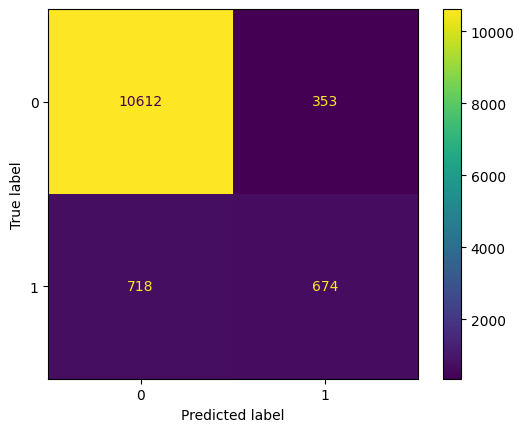

f1 Score: 55.72550640760645%


In [44]:
# Evaluasi model dan lihat skor akurasinya
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,random_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"f1 Score: {f1_score(y_test,random_pred)*100}%")

Skor akurasi yang didapat model Random Forest untuk dapat memprediksikan dataset yang akan datang sebesar 55.7255%

In [45]:
# Melakukan pemodelan untuk seluruh data
final_random_model = random_model.fit(X,y)
final_random_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   TargetEncoder(random_state=8))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=21, random_state=8))])

# **Naive bayes** 

In [46]:
# membuat model dan melatih model
naive_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BernoulliNB())])
naive_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   TargetEncoder(random_state=8))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', BernoulliNB())])

Setelah kita membuat dan melatih model, selanjutnya kita prediksi model tersebut menggunakan data testing

In [47]:
# Membuat prediksi
naive_pred = naive_model.predict(X_test)

Setelah memprediksikan model, selanjutnya kita lakukan evaluasi model

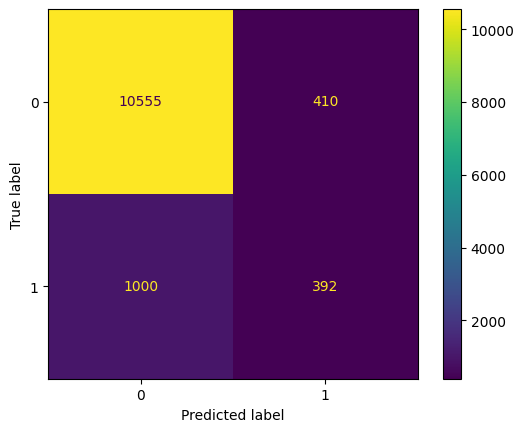

f1 Score: 35.73381950774841%


In [48]:
# Evaluasi model
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,naive_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"f1 Score: {f1_score(y_test,naive_pred)*100}%")

Skor akurasi yang didapat untuk model Naive Bayes adalah 35.733%

In [49]:
# Memodelkan dan melatih dengan data secara keseluruhan
final_naive_model = naive_model.fit(X,y)

In [50]:
# Membuat variabel preds dengan model yang akan dibandingkan
preds = [logistic_pred,svm_pred,dec_pred,naive_pred,random_pred,knn_pred]
models = ["Logistic Regression","Support Vector Machine","Decision Tree","Naive Bayes","Random Forest","K-Nearest Neighbors"]
accuracy_scores = [f1_score(y_test,i)*100 for i in preds]

comparison = pd.DataFrame(
    data=accuracy_scores,columns=["Accuracy Scores"],index=models
).sort_values("Accuracy Scores", ascending=False)

C:\Users\Thinkpad Yoga\AppData\Local\Temp\ipykernel_10944\1611025663.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


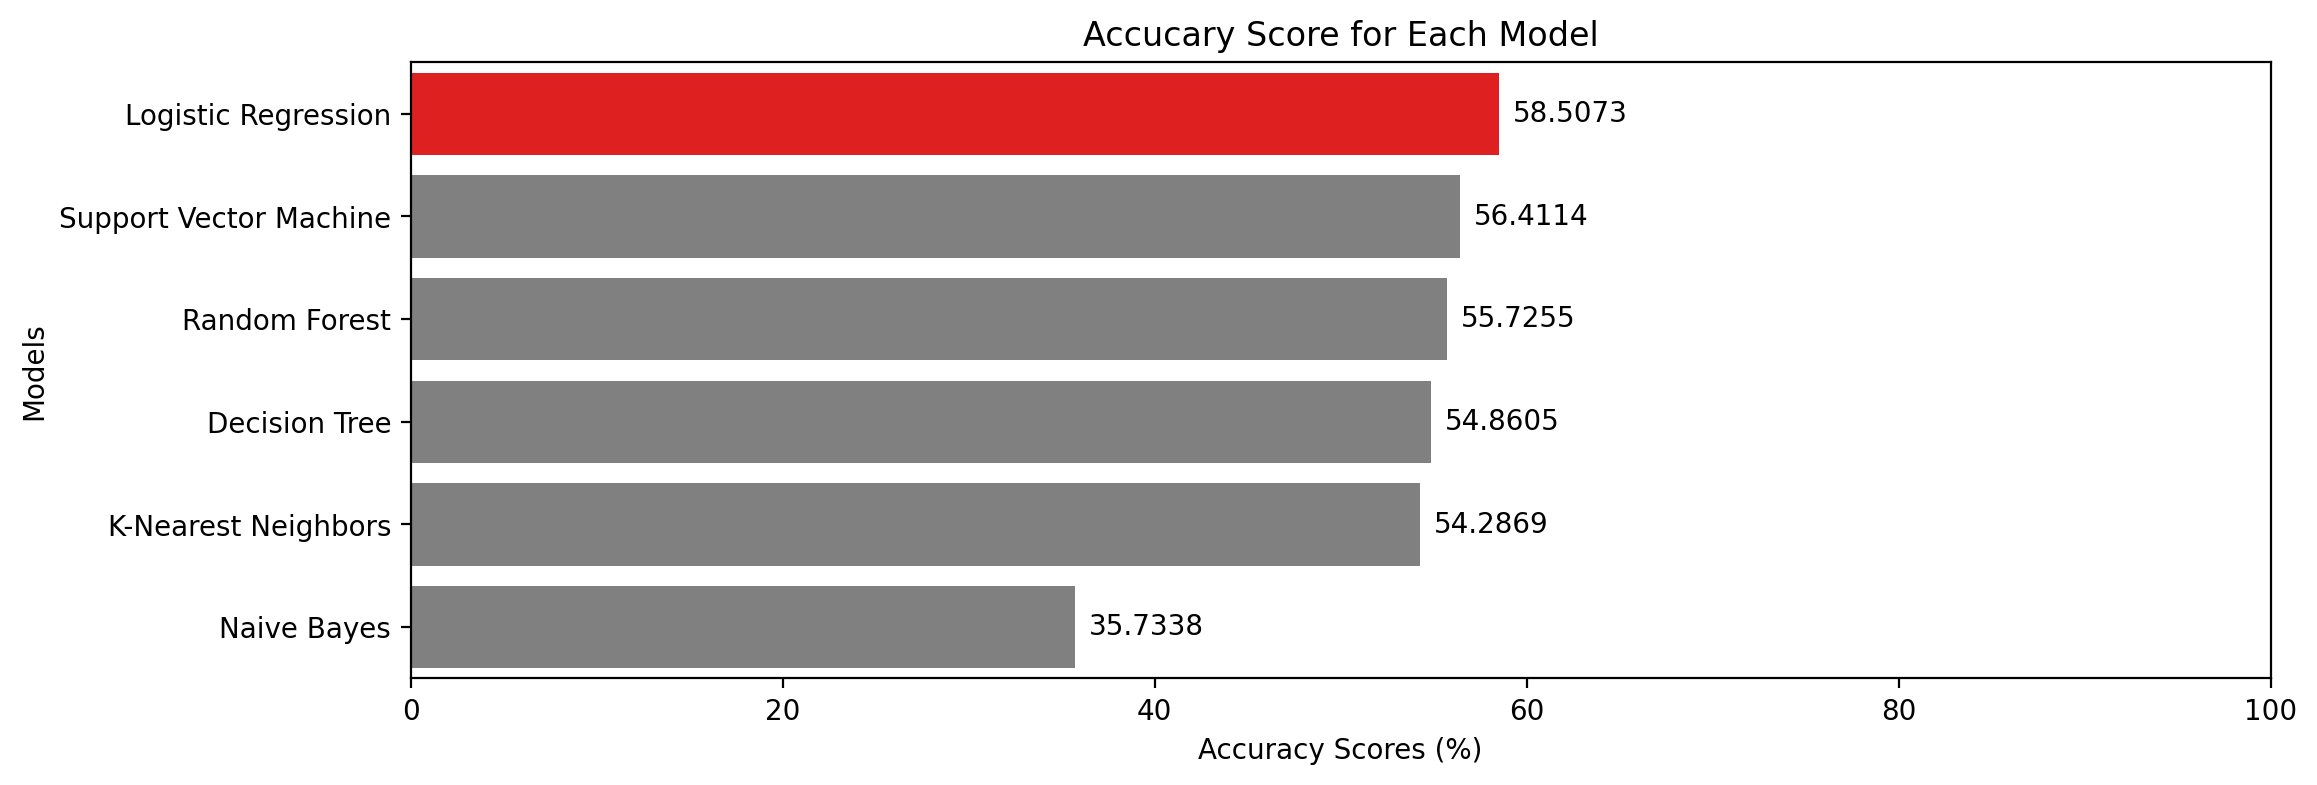

In [51]:
# Membuat bar plot untuk melihat model algoritma yang memiliki skor akurasi paling tinggi
plt.figure(figsize=(12,4),dpi=200)
barplot = sns.barplot(
    data=comparison,
    x="Accuracy Scores",
    y=comparison.index,
    orient="h",
    palette=["red" if i == comparison.head(1).iloc[0,0] else "grey" for i in comparison["Accuracy Scores"]]
)
for bars in barplot.containers:
    barplot.bar_label(bars,padding=5)
plt.title("Accucary Score for Each Model")
plt.xlabel("Accuracy Scores (%)")
plt.ylabel("Models")
plt.xlim(xmax=100)
plt.show()

Berdasarkan analisis di atas, ditemukan bahwa model logistic regression memeiliki f1 score paling tinggi diantara model lainnya dengan nilai f1 skor sebesar 58.5073%

In [52]:
# Save semua model
final_models = [final_log_model,knn_model,final_svm_model,
                final_dec_model,final_random_model,final_naive_model]
file_names = ["logistic_regression","knn","svm","decision_tree","random_forest","naive_bayes"]

for i,j in zip(final_models,file_names):
    dump(i,j+".joblib")
    print(f'{j}.joblib has been saved succesfully!')

logistic_regression.joblib has been saved succesfully!
knn.joblib has been saved succesfully!
svm.joblib has been saved succesfully!
decision_tree.joblib has been saved succesfully!
random_forest.joblib has been saved succesfully!
naive_bayes.joblib has been saved succesfully!


# **Conclusion**

Berdasarkan analisis yang telah dilakukan diatas, dapat kita simpulkan bahwa model algoritma yang maksimal dalam memberikan prediksi untuk dataset "BankAdditional" ini adalah Logistic Regression karena memiliki skor f1 58.5073 yang mana skor tersebut merupakan skor paling tinggi diantara model yang lain. Selain itu, hal yang dapat silihat lagi adalah perbandingan hasil prediksi diatas, pada model Logistic Regression memberikan prediksi hampir semuanya sama dengan data aktualnya. Maka dari itu dapat dikatakan bahwa `model algortima yang cocok untuk dataset atau kasus ini adalah Logistic Regression`